# Reinforcement Learning

This Jupyter notebook acts as supporting material for **Chapter 21 Reinforcement Learning** of the book* Artificial Intelligence: A Modern Approach*. This notebook makes use of the implementations in `rl.py` module. We also make use of implementation of MDPs in the `mdp.py` module to test our agents. It might be helpful if you have already gone through the Jupyter notebook dealing with Markov decision process. Let us import everything from the `rl` module. It might be helpful to view the source of some of our implementations. Please refer to the Introductory Jupyter notebook for more details.

In [1]:
import ipywidgets as widgets


R = widgets.Dropdown(
    options=[-0.01, -0.3, -0.6],
    value=-0.3,
    description='R: ',
    disabled=False,
)

gamma = widgets.Dropdown(
    options=[0.80, 0.85, 0.9, 0.98, 1],
    value=0.98,
    description='gamma: ',
    disabled=False,
)

no_of_episodes = widgets.Dropdown(
    options=[1000, 5000, 10000],
    value=5000,
    description='no_of_episodes: ',
    disabled=False,
)

threshold = widgets.Dropdown(
    options=[100, 500, 1000],
    value=500,
    description='threshold: ',
    disabled=False,
)

M = widgets.Dropdown(
    options=[2000, 50000, 100000],
    value=50000,
    description='M: ',
    disabled=False,
)

B = widgets.Dropdown(
    options=[10, 30, 50],
    value=30,
    description='B: ',
    disabled=False,
)

K = widgets.Dropdown(
    options=[0, 100, 500, 10000],
    value=500,
    description='K: ',
    disabled=False,
)

alpha_num = widgets.Dropdown(
    options=[60,200, 500, 1000],
    value=200,
    description='alpha_num: ',
    disabled=False,
)

Ne = widgets.Dropdown(
    options=[60,100, 200, 300],
    value=100,
    description='Ne: ',
    disabled=False,
)

Rplus = widgets.Dropdown(
    options=[0,2, 5, 1000],
    value=2,
    description='Rplus:',
    disabled=False,
)

display(R, threshold, gamma, no_of_episodes, M, B, K, Ne, Rplus, alpha_num)


Dropdown(description='R: ', index=1, options=(-0.01, -0.3, -0.6), value=-0.3)

Dropdown(description='threshold: ', index=1, options=(100, 500, 1000), value=500)

Dropdown(description='gamma: ', index=3, options=(0.8, 0.85, 0.9, 0.98, 1), value=0.98)

Dropdown(description='no_of_episodes: ', index=1, options=(1000, 5000, 10000), value=5000)

Dropdown(description='M: ', index=1, options=(2000, 50000, 100000), value=50000)

Dropdown(description='B: ', index=1, options=(10, 30, 50), value=30)

Dropdown(description='K: ', index=2, options=(0, 100, 500, 10000), value=500)

Dropdown(description='Ne: ', index=1, options=(60, 100, 200, 300), value=100)

Dropdown(description='Rplus:', index=1, options=(0, 2, 5, 1000), value=2)

Dropdown(description='alpha_num: ', index=1, options=(60, 200, 500, 1000), value=200)

In [2]:
R = float(R.value)
gamma = float(gamma.value)
no_of_episodes = int(no_of_episodes.value)
threshold = int(threshold.value)
M = int(M.value)
B = int(B.value)
K = int(K.value)
Ne = int(Ne.value)
Rplus = int(Rplus.value)
alpha_num = int(alpha_num.value)

alpha = lambda n: alpha_num /(alpha_num-1+n)

In [3]:
from reinforcement_learning4e import *

In [4]:
from mdp4e import GridMDP
from mdp4e import value_iteration
sequential_decision_environment = GridMDP([[R, R, R, R, R, R, R, 10],
                                           [R, R, -1, R, R, R, R, R],
                                           [R, -1, -10, -1, R, R, R, -1],
                                           [R, R, -1, R, None, None, None, -10],
                                           [-1, R, R, R, R, -1, R, -1],
                                           [-10, -1, R, R, -1, -10, -1, R],
                                           [-1, R, R, R, R, -1, R, R],
                                           [R, R, R, R, R, R, R, R]],
                                          terminals=[(7, 7)],gamma = gamma)

## ACTIVE REINFORCEMENT LEARNING

Unlike Passive Reinforcement Learning in Active Reinforcement Learning we are not bound by a policy pi and we need to select our actions. In other words the agent needs to learn an optimal policy. The fundamental tradeoff the agent needs to face is that of exploration vs. exploitation. 

### QLearning Agent

The QLearningAgent class in the rl module implements the Agent Program described in **Fig 21.8** of the AIMA Book. In Q-Learning the agent learns an action-value function Q which gives the utility of taking a given action in a particular state. Q-Learning does not required a transition model and hence is a model free method. Let us look into the source before we see some usage examples.

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def graph_utility_estimates_q_learning(agent_program, mdp, no_of_episodes, states_to_graph):
    graphs = {state:[] for state in states_to_graph}
    for iteration in range(1,no_of_episodes+1):
        run_single_trial(agent_program, mdp)
        U = defaultdict(lambda: -1000.) # Very Large Negative Value for Comparison see below.
        for state_action, value in q_agent.Q.items():
            state, action = state_action
            if U[state] < value:
                        U[state] = value
        for state in states_to_graph:
            graphs[state].append((iteration, U[state]))
    for state, value in graphs.items():
        state_x, state_y = zip(*value)
#         X_Y_Spline = make_interp_spline(state_x, state_y)
#         X_ = np.linspace(1, no_of_episodes, 10)
#         Y_ = X_Y_Spline(X_)
#         plt.plot(X_, Y_)
        plt.plot(state_x, state_y, label=str(state))
#     plt.ylim([0,1.2])
    plt.legend(loc='lower right')
    plt.xlabel('Iterations')
    plt.ylabel('U')

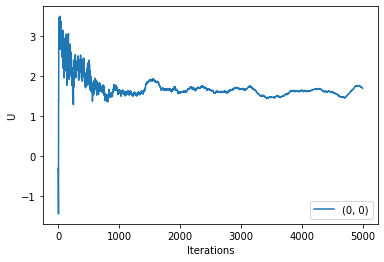

In [6]:
q_agent = QLearningAgent(mdp=sequential_decision_environment,epsilon_greedy=True, alpha=alpha,threshold=threshold,
                        Ne=Ne,Rplus=Rplus,no_of_episodes=no_of_episodes,B=B,M=M,K=K)
graph_utility_estimates_q_learning(q_agent, sequential_decision_environment, no_of_episodes, [(0,0)])

In [7]:
U = defaultdict(lambda: -1000.) # Very Large Negative Value for Comparison see below.
for state_action, value in q_agent.Q.items():
    state, action = state_action
    if U[state] < value:
                U[state] = value

In [8]:
U.get((0,0))

1.701058872412097

In [9]:
print(value_iteration(sequential_decision_environment).get((0,0)))

1.5818525919513926
